In [2]:
import sys
sys.path.append('../_amigocloud')
import simplekml
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
import os

In [3]:
def get_unidad_local():
    try:
        # ruta del archivo que contiene la información necesaria
        with open('../../unidad_local.txt', 'r') as file:
            unidad = file.readline().strip()
            return unidad
    except FileNotFoundError:
        print("El archivo 'unidad_local.txt' no se encuentra en la ruta especificada.")
    return None

def get_ruta_local():
    try:
        with open('../ruta_local.txt', 'r') as file:
            ruta = file.readline().strip()
            return ruta
    except FileNotFoundError:
        print("El archivo 'ruta_local.txt' no se encuentra en la ruta especificada.")
    return None

In [5]:
ors = 15

In [6]:
# RUTA ONEDRIVE
unidad = get_unidad_local()
ruta = get_ruta_local()
ruta_completa = os.path.join(unidad, ruta)
ruta_completa

'G:\\OneDrive - Ingenio Azucarero Guabira S.A\\_DATOS_PYTHON'

In [7]:
# leer token
acceso = open(ruta_completa + '/_keys/api_amigocloud_gral.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

# leer los dos shps de siembra y puntos de planificacion
path_cat = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\catastro_S09_MIERCOLES.shp'
path_puntos = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PUNTOS_PLAN.shp'
path_plan = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = unidad + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [10]:
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [11]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,obs,procesado,geometry
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,"MULTIPOINT (466488.843 8078851.395, 466527.935..."
27,4914,GONZALEZ LIMPIAS LUIS ALBERTO,15,None,None,"MULTIPOINT (454248.573 8077260.553, 454761.177..."
28,12308,ROCA CHAVEZ MAURICIO DANIEL,15,None,None,"MULTIPOINT (430364.975 8093935.619, 430475.107..."


In [12]:
multipoint_gdf = gdf_puntos_sem.copy()

In [13]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [14]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,obs,procesado,geometry
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (466488.843 8078851.395)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (466527.935 8078717.118)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (466660.227 8078599.379)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (466715.062 8078736.301)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (466933.344 8078684.707)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (467043.874 8080168.229)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (467145.474 8079791.990)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (467175.636 8080209.504)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (467181.986 8079606.253)
26,14562,VACA HURTADO JULIO ERNESTO,15,None,None,POINT (467634.425 8079563.390)


<Axes: >

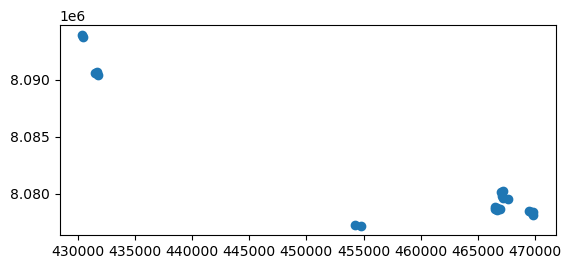

In [15]:
puntos_indi.plot()

In [16]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [17]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [18]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2726,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F4,16.595016,0.0,50,"POLYGON ((430833.217 8093742.018, 430174.379 8..."
2728,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F6,14.581199,0.0,50,"POLYGON ((430751.934 8093959.186, 430090.584 8..."
4211,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L12.1,2.889576,2.0,50,"POLYGON ((467281.199 8080092.893, 467241.732 8..."
4395,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L24,5.159089,1.0,50,"POLYGON ((467513.154 8079536.904, 467512.660 8..."
6019,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,E1,5.640439,2.0,50,"POLYGON ((431610.957 8090426.268, 431726.181 8..."
6669,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,E3,14.153729,2.0,50,"POLYGON ((431316.990 8090976.309, 431409.343 8..."
7137,298.0,LA VICTORIA--GONZALES LUIS,4914.0,GONZALEZ LIMPIAS LUIS ALBERTO,L4,28.780297,0.0,40,"POLYGON ((454479.343 8076968.915, 454481.956 8..."
7195,2125.0,VILLA LITTE ZONA EL CIDRAL,41539.0,VACA MENDEZ JULIO EDUARDO,L1,6.037451,0.0,50,"POLYGON ((469516.931 8078350.319, 469558.862 8..."
7214,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,E2,10.773935,1.0,50,"POLYGON ((431216.908 8090875.854, 431311.345 8..."
7483,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L12,2.983044,3.0,50,"POLYGON ((466842.141 8080184.048, 466896.925 8..."


In [19]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [20]:
poligonos_intersect_cat.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
2726,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F4,16.595016,0.0,50,"POLYGON ((430833.217 8093742.018, 430174.379 8..."
2728,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F6,14.581199,0.0,50,"POLYGON ((430751.934 8093959.186, 430090.584 8..."
4211,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L12.1,2.889576,2.0,50,"POLYGON ((467281.199 8080092.893, 467241.732 8..."


In [21]:
# agrega los campos faltantes
poligonos_intersect_cat['os'] = ors

In [22]:
plan = poligonos_intersect_cat.copy()

In [23]:
plan.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os
2726,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F4,16.595016,0.0,50,"POLYGON ((430833.217 8093742.018, 430174.379 8...",15
2728,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F6,14.581199,0.0,50,"POLYGON ((430751.934 8093959.186, 430090.584 8...",15
4211,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L12.1,2.889576,2.0,50,"POLYGON ((467281.199 8080092.893, 467241.732 8...",15


<Axes: >

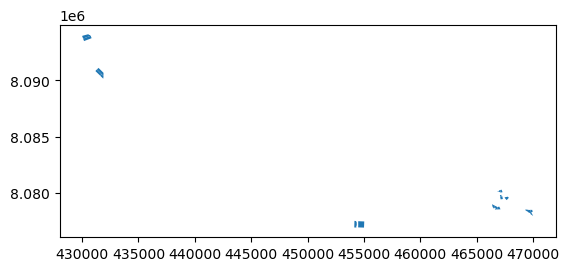

In [24]:
plan.plot()

In [25]:
plan['area'].sum()

150.30911626527157

In [26]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [27]:
plan['area'].sum()

151.35838410520907

In [28]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [29]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [30]:
last_id

193

In [31]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [32]:
plan.head(3)

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os,id
2726,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F4,16.595016,0.0,50,"POLYGON ((430833.217 8093742.018, 430174.379 8...",15,194
2728,1618.0,MONTE REY I--ROCA MAURICIO,12308.0,ROCA CHAVEZ MAURICIO DANIEL,F6,14.581199,0.0,50,"POLYGON ((430751.934 8093959.186, 430090.584 8...",15,195
4211,184.0,EL CARMEN CIDRAL--VACA JULIO,14562.0,VACA HURTADO JULIO ERNESTO,L12.1,2.889576,2.0,50,"POLYGON ((467281.199 8080092.893, 467241.732 8...",15,196


In [33]:
len(plan)

21

In [34]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [35]:
gdf_pla_gral['area'].sum()

1876.6047219232578

In [36]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [37]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,os,soca,id,inst,idd,geometry
0,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L31,30.260942,1,2,1,50,1.0,"POLYGON ((504085.659 8094406.031, 503737.808 8..."
1,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L16,23.216246,1,4,2,50,1.0,"POLYGON ((504352.053 8094797.970, 504272.088 8..."
2,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L6,19.683505,1,5,3,50,1.0,"POLYGON ((503260.583 8094596.306, 503714.735 8..."
3,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L35,7.795719,1,4,4,50,1.0,"POLYGON ((504693.348 8094607.629, 504673.327 8..."
4,30,CAMPO DULCE,41594,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L34,7.048921,1,5,5,50,1.0,"POLYGON ((504137.327 8094415.183, 504648.080 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L28.2,5.396085,15,1,210,50,NaN,"POLYGON ((466659.280 8078673.443, 466600.333 8..."
184,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L28.5,0.834773,15,1,211,50,NaN,"POLYGON ((466661.846 8078661.370, 466746.029 8..."
185,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L28.3,3.981152,15,1,212,50,NaN,"POLYGON ((466585.942 8078778.095, 466536.420 8..."
186,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L28.1,4.483146,15,1,213,50,NaN,"POLYGON ((466832.970 8078774.525, 466845.330 8..."


In [38]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

# CARGAR PLANIFICACION A AMIGOCLOUD

In [39]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [40]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [41]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [42]:
len(gdf_pla_gral)

21

In [43]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/35248/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_360912 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CARGAR XLSX

In [44]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [45]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [46]:
excel_data = pd.read_excel(path_xlsx_parte)

In [47]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,os,id
2726,1618,MONTE REY I--ROCA MAURICIO,12308,ROCA CHAVEZ MAURICIO DANIEL,F4,16.595016,0,50,"MULTIPOLYGON (((-63.65062 -17.24033, -63.65683...",15,194
2728,1618,MONTE REY I--ROCA MAURICIO,12308,ROCA CHAVEZ MAURICIO DANIEL,F6,14.581199,0,50,"MULTIPOLYGON (((-63.65138 -17.23836, -63.65761...",15,195
4211,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L12.1,2.889576,2,50,"MULTIPOLYGON (((-63.30798 -17.36452, -63.30835...",15,196
4395,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L24,6.208356,1,50,"MULTIPOLYGON (((-63.30581 -17.36955, -63.30581...",15,197
6019,1618,MONTE REY I--ROCA MAURICIO,12308,ROCA CHAVEZ MAURICIO DANIEL,E1,5.640439,2,50,"MULTIPOLYGON (((-63.64341 -17.27032, -63.64232...",15,198
6669,1618,MONTE REY I--ROCA MAURICIO,12308,ROCA CHAVEZ MAURICIO DANIEL,E3,14.153729,2,50,"MULTIPOLYGON (((-63.64616 -17.26534, -63.64529...",15,199
7137,298,LA VICTORIA--GONZALES LUIS,4914,GONZALEZ LIMPIAS LUIS ALBERTO,L4,28.780297,0,40,"MULTIPOLYGON (((-63.42855 -17.39254, -63.42852...",15,200
7195,2125,VILLA LITTE ZONA EL CIDRAL,14562,VACA HURTADO JULIO ERNESTO,L1,6.037451,0,50,"MULTIPOLYGON (((-63.28696 -17.38030, -63.28657...",15,201
7214,1618,MONTE REY I--ROCA MAURICIO,12308,ROCA CHAVEZ MAURICIO DANIEL,E2,10.773935,1,50,"MULTIPOLYGON (((-63.64710 -17.26625, -63.64621...",15,202
7483,184,EL CARMEN CIDRAL--VACA JULIO,14562,VACA HURTADO JULIO ERNESTO,L12,2.983044,3,50,"MULTIPOLYGON (((-63.31211 -17.36369, -63.31160...",15,203


In [48]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [49]:
new_df.head(3)

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,ID,OS
0,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,F4,16.595016,0,194,15
1,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,F6,14.581199,0,195,15
2,50,14562,VACA HURTADO JULIO ERNESTO,184,EL CARMEN CIDRAL--VACA JULIO,L12.1,2.889576,2,196,15


In [50]:
# extrae los valores de Nº DE LABOR, convierte a conjunto y luego a lista
lista_cite = list(set(excel_data['Nº DE LABOR']))

In [51]:
# extrae los valores numericos de cada Nº DE LABOR
lista_num = [int(i.split('-')[-1]) for i in lista_cite]
lista_num

[27,
 11,
 20,
 18,
 15,
 19,
 8,
 4,
 12,
 28,
 9,
 26,
 2,
 5,
 21,
 14,
 22,
 25,
 6,
 13,
 10,
 1,
 17]

In [52]:
next_num_labor = max(lista_num) + 1
next_num_labor

29

In [53]:
new_df['MEZCLA'] = 0
new_df['LABOR_REALIZADA'] = 'PUL. CON DRONE'
new_df['Nº DE LABOR'] = 'PA-2025-' + str(next_num_labor)

In [54]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,ID,OS,MEZCLA,LABOR_REALIZADA,Nº DE LABOR
0,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,F4,16.595016,0,194,15,0,PUL. CON DRONE,PA-2025-29
1,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,F6,14.581199,0,195,15,0,PUL. CON DRONE,PA-2025-29
2,50,14562,VACA HURTADO JULIO ERNESTO,184,EL CARMEN CIDRAL--VACA JULIO,L12.1,2.889576,2,196,15,0,PUL. CON DRONE,PA-2025-29
3,50,14562,VACA HURTADO JULIO ERNESTO,184,EL CARMEN CIDRAL--VACA JULIO,L24,6.208356,1,197,15,0,PUL. CON DRONE,PA-2025-29
4,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,E1,5.640439,2,198,15,0,PUL. CON DRONE,PA-2025-29
5,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,E3,14.153729,2,199,15,0,PUL. CON DRONE,PA-2025-29
6,40,4914,GONZALEZ LIMPIAS LUIS ALBERTO,298,LA VICTORIA--GONZALES LUIS,L4,28.780297,0,200,15,0,PUL. CON DRONE,PA-2025-29
7,50,14562,VACA HURTADO JULIO ERNESTO,2125,VILLA LITTE ZONA EL CIDRAL,L1,6.037451,0,201,15,0,PUL. CON DRONE,PA-2025-29
8,50,12308,ROCA CHAVEZ MAURICIO DANIEL,1618,MONTE REY I--ROCA MAURICIO,E2,10.773935,1,202,15,0,PUL. CON DRONE,PA-2025-29
9,50,14562,VACA HURTADO JULIO ERNESTO,184,EL CARMEN CIDRAL--VACA JULIO,L12,2.983044,3,203,15,0,PUL. CON DRONE,PA-2025-29


In [55]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [56]:
final_data.to_excel(path_xlsx_parte, index=False)